Realizar una simulación Monte Carlo nos ayuda a comprender de mejor manera conceptos como insesgadez, varianza de un estimador, estimadores, estimaciones y la consecuencia de la violación de los supuestos de regresión.

Por lo tanto, se mostrará a continuación una muestra que sea consistente con los supuestos **(SRLS1-SRLS5)**. Simulamos una muestra de tamaño $n=1000$, con parámetros poblacionales $\beta_0 = 2$ y $\beta_1 = 0.8$, establecemos la desviación estandar del término de error en $\sigma = 2$

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [27]:
# Establecer una semilla aleatoria:
np.random.seed(1234567)

In [28]:
# Establecer el tamaño de la muestra:
n = 1000
# Establecer los verdaderos parámetros:
beta0 = 2
beta1 = 0.8
su = 2

In [29]:
# extraer una muestra de tamaño n:
x = stats.norm.rvs(loc=4, scale=1, size=n) #x iid
u = stats.norm.rvs(loc=0, scale=su, size=n) #u iid
# Genear el modelo poblacional:
y = beta0 + beta1 * x + u #generamos y

#Construir el Data Set:
df = pd.DataFrame({'y': y, 'x': x})
df.head(5)

,y,x
0,2.671922,3.485375
1,4.106596,3.550446
2,6.429728,5.734621
3,6.464994,4.643380
4,7.309361,4.026139


In [30]:
# Estimamos los parámetros mediante MCO
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(f'estimates betas: \n{b}\n')

estimates betas: 
Intercept    2.190238
x            0.744255
dtype: float64



In [31]:
# características de la muestra para la fórmula de varianza:
x_sq_mean = np.mean(x ** 2)
print(f'x_sq_mean: {x_sq_mean}\n')
x_var = np.sum((x - np.mean(x)) ** 2)
print(f'x_var: {x_var}\n')

x_sq_mean: 17.27675304867723

x_var: 953.7353266586754



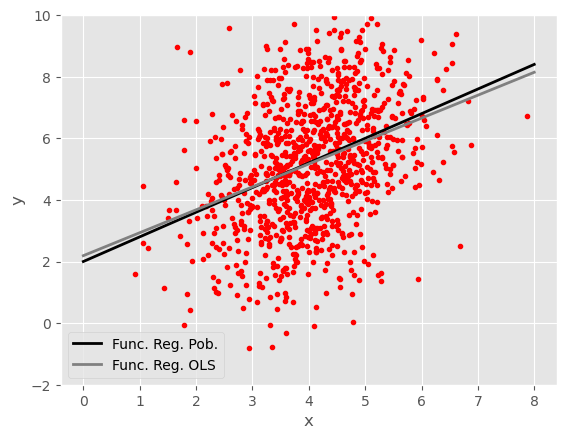

In [32]:
# graph:
x_range = np.linspace(0, 8, num=100)
plt.ylim([-2, 10])
plt.plot(x, y, color='red', marker='.', linestyle='')
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
        linestyle='-', linewidth=2, label='Func. Reg. Pob.')
plt.plot(x_range, b[0] + b[1] * x_range, color='grey',
        linestyle='-', linewidth=2, label='Func. Reg. OLS')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

De esta forma, para que nuestros estimadores MCO tengan propiedades deseables, cumplimos con algunos supuestos en el modelos de regresión poblacional. Se cuenta con una muestra aleatoria de tamaño $n$; se extrae una muestra aleatoria para $x$, cumpliendo el supuesto de que esta variable presente volatilidad; existe linealidad en los parámetros, al construir el modelo de regresión poblacional de forma en que los parámetros sean lineales, cumplimos el supuesto de linealidad; por último, tanto $x$ como $u$ se generaron de una forma independiente, de esta manera cumplimos el supuesto de que la esperanza de $u$ dado $x$ sea igual a cero.

Con estos supuestos, podemos comprobar la insesgadez de nuestros estimadores de los parámetros:
$$E(\hat{\beta}_i) = \beta_i$$
Tal como se puede apreciar, los parámetros estimados no se alejan demasiado de los parámetros reales.

Junto a esto podemos comprobar que las varianzas de nuestros estimadores son relativamente pequeñas, con errores estandar de $0.270$ y $0.065$ para los estimadores de $\beta_0$ y $\beta_1$, significa que la variabilidad en torno a la estimación puntual es baja.

In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     131.7
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.03e-28
Time:                        16:22:36   Log-Likelihood:                -2112.7
No. Observations:                1000   AIC:                             4229.
Df Residuals:                     998   BIC:                             4239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1902      0.270      8.124      0.0